⚛ K-means clustering is used for unsupervised classification. It groups similar data together based on their features, without using any pre-existing labels. Instead, it identifies patterns in the data based on the data attributes themselves. The ‘clusters’ are formed by grouping together data that are similar to each other in some way, according to a predefined distance or similarity measure.

⚛If we have a labeled dataset, the number of clusters k in K-means is often set to the number of unique labels or classes in the dataset. This is because we expect the data points from the same class to be more similar to each other than to data points from different classes.

For example, in the Iris dataset, there are three species of Iris flowers, so we would typically set k to 3.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
# Load the iris dataset
iris = load_iris()
X = iris.data


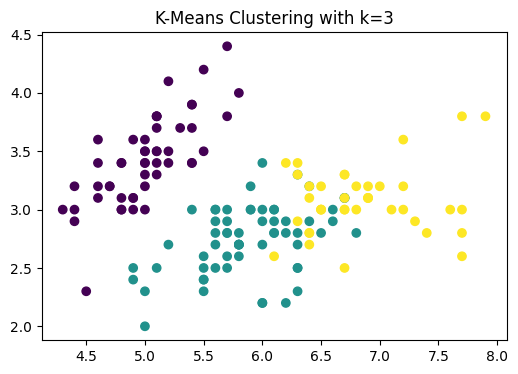

In [ ]:



# Define a list of different values for k
k_values = [3]

for k in k_values:
    # Initialize centroids randomly
    centroids = X[np.random.choice(range(X.shape[0]), size=k, replace=False)]

    while True:
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(k)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    # Plot the data colored by cluster assignments
    plt.figure(figsize=(6, 4))
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.title(f'K-Means Clustering with k=3')
    plt.show()


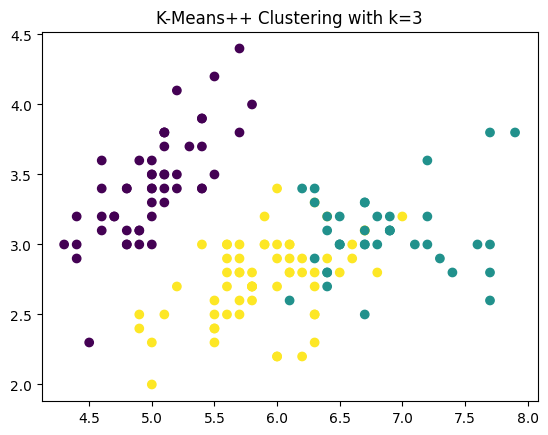

In [ ]:

def initialize_kmeans_plusplus(points, K):
    centroids = [points[0]]
    for _ in range(1, K):
        dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in points])
        probs = dist_sq/dist_sq.sum()
        cumulative_probs = probs.cumsum()
        r = np.random.rand()

        for j, p in enumerate(cumulative_probs):
            if r < p:
                i = j
                break

        centroids.append(points[i])
    return np.array(centroids)
# Initialize centroids using k-means++
centroids = initialize_kmeans_plusplus(X, k)

while True:
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(distances, axis=0)
    new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(k)])

    if np.all(centroids == new_centroids):
        break

    centroids = new_centroids
plt.title(f'K-Means++ Clustering with k=3')
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()
